<a href="https://colab.research.google.com/github/didinroych/python/blob/didinroych-patch-3/Model14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
path = kagglehub.dataset_download("dansbecker/food-101")

print("Path to dataset files:", path)

100%|██████████| 9.38G/9.38G [07:28<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dansbecker/food-101/versions/1


In [ ]:
!cp -r /root/.cache/kagglehub/datasets/dansbecker/food-101/versions/1 /content/dataset

In [ ]:
import shutil

# Direktori asal dan tujuan
source_dir = '/content/dataset/food-101/food-101/images'
output_dir = '/content/dataset/food-101/food-101/subsets'

# Pastikan direktori output ada
os.makedirs(output_dir, exist_ok=True)

# Daftar 20 kelas makanan populer di Indonesia
chosen_classes = [
    'fried_rice', 'chicken_curry', 'dumplings', 'spring_rolls', 'sushi',
    'ramen', 'fried_calamari', 'hamburger', 'pizza', 'ice_cream',
    'donuts', 'chocolate_cake', 'tiramisu', 'spaghetti_bolognese',
    'pancakes', 'waffles', 'pad_thai', 'chicken_wings', 'takoyaki',
    'french_fries'
]

# Direktori tujuan untuk subset
subset_dir = os.path.join(output_dir, 'indonesian_popular_subset')
os.makedirs(subset_dir, exist_ok=True)

# Proses kelas yang dipilih
for class_name in chosen_classes:
    class_path = os.path.join(source_dir, class_name)
    target_path = os.path.join(subset_dir, class_name)

    # Periksa apakah kelas tersedia di source directory
    if os.path.exists(class_path):
        # Jika sudah ada di tujuan, hapus untuk mengganti
        if os.path.exists(target_path):
            shutil.rmtree(target_path)

        # Salin direktori kelas
        shutil.copytree(class_path, target_path)
        print(f"Kelas '{class_name}' berhasil disalin.")
    else:
        print(f"Kelas '{class_name}' tidak ditemukan di direktori asal.")

print("Subset dengan kelas makanan populer selesai dibuat.")


Kelas 'fried_rice' berhasil disalin.
Kelas 'chicken_curry' berhasil disalin.
Kelas 'dumplings' berhasil disalin.
Kelas 'spring_rolls' berhasil disalin.
Kelas 'sushi' berhasil disalin.
Kelas 'ramen' berhasil disalin.
Kelas 'fried_calamari' berhasil disalin.
Kelas 'hamburger' berhasil disalin.
Kelas 'pizza' berhasil disalin.
Kelas 'ice_cream' berhasil disalin.
Kelas 'donuts' berhasil disalin.
Kelas 'chocolate_cake' berhasil disalin.
Kelas 'tiramisu' berhasil disalin.
Kelas 'spaghetti_bolognese' berhasil disalin.
Kelas 'pancakes' berhasil disalin.
Kelas 'waffles' berhasil disalin.
Kelas 'pad_thai' berhasil disalin.
Kelas 'chicken_wings' berhasil disalin.
Kelas 'takoyaki' berhasil disalin.
Kelas 'french_fries' berhasil disalin.
Subset dengan kelas makanan populer selesai dibuat.


In [ ]:
import os

def count_images_in_folders(base_dir, max_images=300):
    folder_counts = {}
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        if os.path.isdir(folder_path):
            # Limit the number of images to max_images
            image_count = 0
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                if os.path.isfile(file_path):
                    image_count += 1
                    if image_count >= max_images:
                        break
            folder_counts[folder_name] = image_count
    return folder_counts

base_directory = '/content/dataset/food-101/food-101/subsets/indonesian_popular_subset'  # Provide full valid path
if not os.path.exists(base_directory):
    print(f"Error: The directory {base_directory} does not exist.")
else:
    image_counts = count_images_in_folders(base_directory)
    for folder, count in image_counts.items():
        print(f"Folder '{folder}' contains {count} images.")


Folder 'ramen' contains 300 images.
Folder 'pancakes' contains 300 images.
Folder 'donuts' contains 300 images.
Folder 'dumplings' contains 300 images.
Folder 'pad_thai' contains 300 images.
Folder 'takoyaki' contains 300 images.
Folder 'tiramisu' contains 300 images.
Folder 'chicken_wings' contains 300 images.
Folder 'chocolate_cake' contains 300 images.
Folder 'fried_rice' contains 300 images.
Folder 'pizza' contains 300 images.
Folder 'ice_cream' contains 300 images.
Folder 'french_fries' contains 300 images.
Folder 'fried_calamari' contains 300 images.
Folder 'hamburger' contains 300 images.
Folder 'chicken_curry' contains 300 images.
Folder 'waffles' contains 300 images.
Folder 'sushi' contains 300 images.
Folder 'spaghetti_bolognese' contains 300 images.
Folder 'spring_rolls' contains 300 images.


In [ ]:
subset_1_dir = '/content/dataset/food-101/food-101/subsets/indonesian_popular_subset'

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

# Assuming your images are organized into subfolders within 'source_dir'
# where each subfolder name corresponds to a class index in subset_1
train_data = datagen.flow_from_directory(
    subset_1_dir, # Changed from subset_1 to source_dir
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

val_data = datagen.flow_from_directory(
    subset_1_dir, # Changed from subset_1 to source_dir
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)


# Accessing the class indices
class_labels = train_data.class_indices
print(class_labels)

Found 18000 images belonging to 20 classes.
Found 2000 images belonging to 20 classes.
{'chicken_curry': 0, 'chicken_wings': 1, 'chocolate_cake': 2, 'donuts': 3, 'dumplings': 4, 'french_fries': 5, 'fried_calamari': 6, 'fried_rice': 7, 'hamburger': 8, 'ice_cream': 9, 'pad_thai': 10, 'pancakes': 11, 'pizza': 12, 'ramen': 13, 'spaghetti_bolognese': 14, 'spring_rolls': 15, 'sushi': 16, 'takoyaki': 17, 'tiramisu': 18, 'waffles': 19}


In [ ]:
print("Images Shape:",train_data.image_shape)

Images Shape: (128, 128, 3)


In [ ]:
import numpy as np
unique_labels = np.unique(train_data.labels)


print("Labels:", unique_labels)

Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


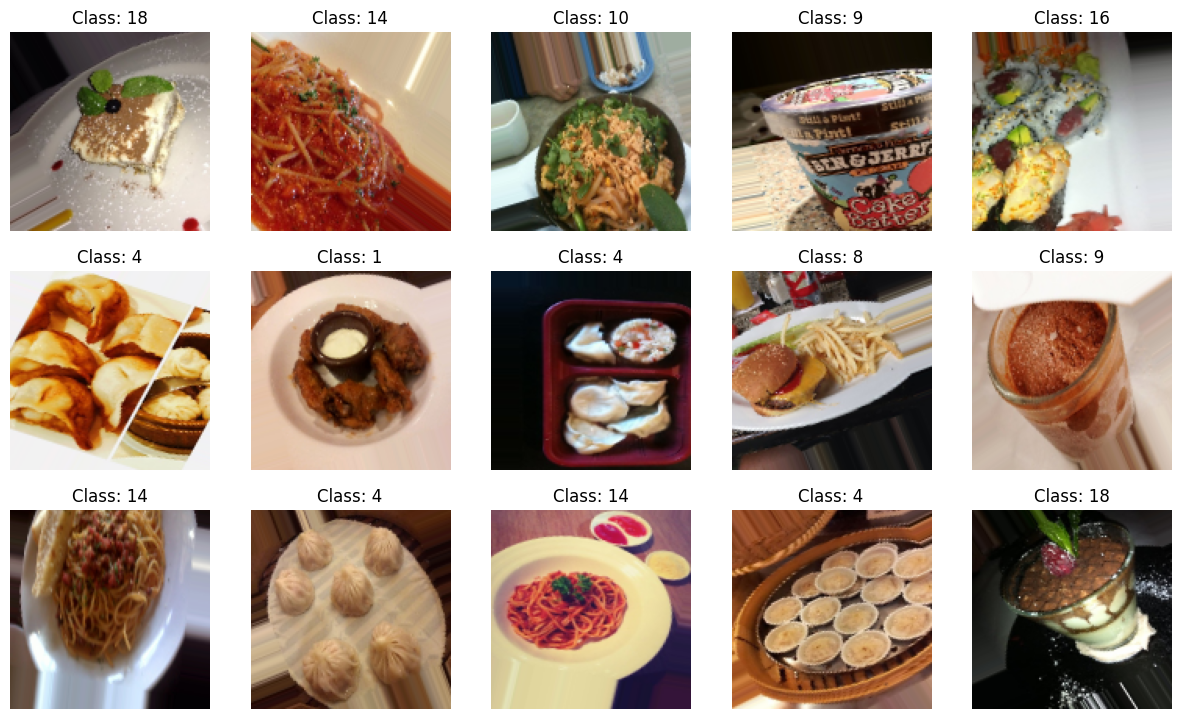

In [ ]:
images, labels = next(train_data)

num_images = 15
plt.figure(figsize=(15, 15))

# Loop through and display the images
for i in range(num_images):
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots
    plt.imshow(images[i])  # Display the image
    plt.title(f"Class: {labels[i].argmax()}")  # Show class label
    plt.axis("off")  # Hide axis for cleaner look

plt.show()


In [ ]:
base_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)
base_model.trainable = False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#from tensorflow.keras.applications import MobileNetV2
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#base_model.trainable = False

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
# Model Convolutional yang terinspirasi dari DenseNet
model = tf.keras.models.Sequential([
    base_model,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Dropout awal untuk regularisasi
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(20, activation='softmax')
])

# Menampilkan ringkasan model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 4, 4, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 4, 4, 32)            │         294,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 4, 4, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,441,044 (28.39 MB)

 Trainable params: 403,348 (1.54 MB)

 Non-trainable params: 7,037,696 (26.85 MB)

In [ ]:
len(val_data)

125

In [ ]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))


In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
#callback
callbacks = EarlyStopping(patience=10, monitor='val_accuracy',restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    callbacks=[callbacks, lr_scheduler],
    validation_data=val_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data),
  )

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 172s 126ms/step - accuracy: 0.3246 - loss: 2.3750 - val_accuracy: 0.5555 - val_loss: 1.5862 - learning_rate: 0.0010
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1125/1125 ━━━━━━━━━━━━━━━━━━━━ 173s 117ms/step - accuracy: 0.5389 - loss: 1.6999 - val_accuracy: 0.5990 - val_loss: 1.4814 - learning_rate: 0.0010
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 140s 116ms/step - accuracy: 0.5889 - loss: 1.5197 - val_accuracy: 0.6280 - val_loss: 1.3827 - learning_rate: 0.0010
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 132s 117ms/step - accuracy: 0.6070 - loss: 1.4507 - val_accuracy: 0.6340 - val_loss: 1.3448 - learning_rate: 0.0010
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 132s 117ms/step - accuracy: 0.6241 - loss: 1.3897 - val_accuracy: 0.6385 - val_loss: 1.3078 - learning_rate: 0.0010
Epoch 10/20
1125

In [ ]:
# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train Again (fine-tuning)
history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data),
    callbacks=callbacks
)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 239s 138ms/step - accuracy: 0.6114 - loss: 1.4402 - val_accuracy: 0.7480 - val_loss: 0.9785
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 90us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 148s 131ms/step - accuracy: 0.7330 - loss: 1.0184 - val_accuracy: 0.7800 - val_loss: 0.8293
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 204s 133ms/step - accuracy: 0.7661 - loss: 0.8968 - val_accuracy: 0.7970 - val_loss: 0.8080
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 202s 133ms/step - accuracy: 0.7876 - loss: 0.8215 - val_accuracy: 0.7935 - val_loss: 0.8133
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 151s 133ms/step - accuracy: 0.8147 

In [ ]:
# Evaluation after fine-tuning
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Loss (Fine-Tuning): {val_loss:.4f}")
print(f"Validation Accuracy (Fine-Tuning): {val_acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - accuracy: 0.8267 - loss: 0.6779
Validation Loss (Fine-Tuning): 0.6841
Validation Accuracy (Fine-Tuning): 0.8300


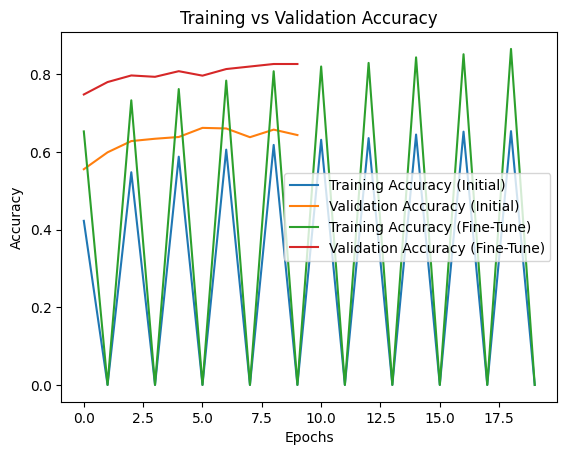

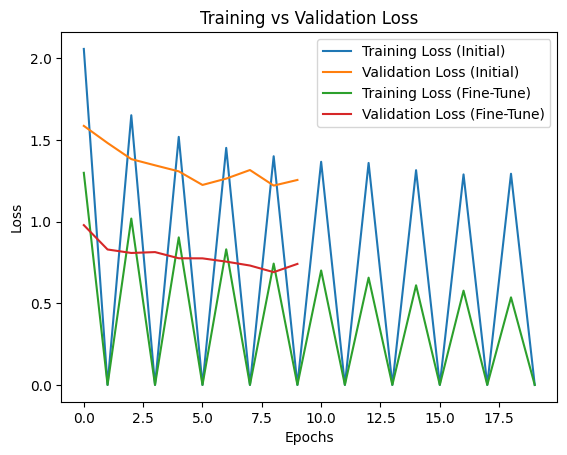

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy (Initial)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Initial)')
plt.plot(history_fine.history['accuracy'], label='Training Accuracy (Fine-Tune)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (Fine-Tune)')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss (Initial)')
plt.plot(history.history['val_loss'], label='Validation Loss (Initial)')
plt.plot(history_fine.history['loss'], label='Training Loss (Fine-Tune)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (Fine-Tune)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.8253 - loss: 0.7115
Val Loss: 0.7178
Val Accuracy: 0.8230


125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step


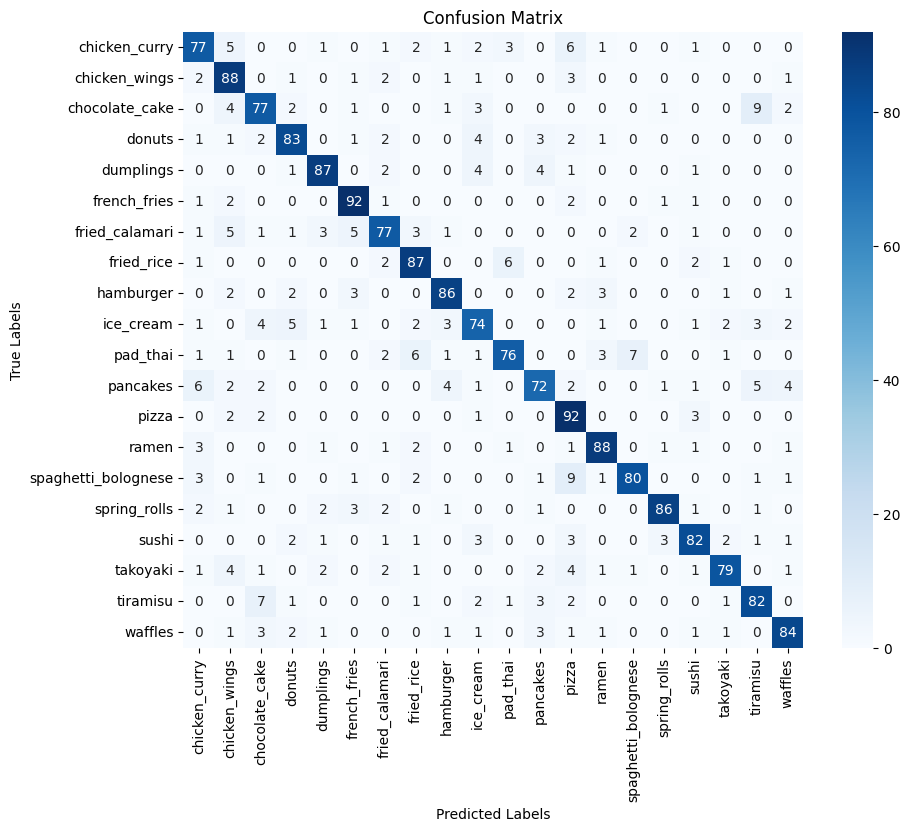

                     precision    recall  f1-score   support

      chicken_curry       0.77      0.77      0.77       100
      chicken_wings       0.75      0.88      0.81       100
     chocolate_cake       0.77      0.77      0.77       100
             donuts       0.82      0.83      0.83       100
          dumplings       0.88      0.87      0.87       100
       french_fries       0.85      0.92      0.88       100
     fried_calamari       0.81      0.77      0.79       100
         fried_rice       0.81      0.87      0.84       100
          hamburger       0.86      0.86      0.86       100
          ice_cream       0.76      0.74      0.75       100
           pad_thai       0.87      0.76      0.81       100
           pancakes       0.81      0.72      0.76       100
              pizza       0.71      0.92      0.80       100
              ramen       0.87      0.88      0.88       100
spaghetti_bolognese       0.89      0.80      0.84       100
       spring_rolls    

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prediksi pada validation/test data
val_preds = model.predict(val_data)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = val_data.classes

# Confusion matrix
cm = confusion_matrix(true_classes, val_preds_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_data.class_indices.keys(), yticklabels=val_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=val_data.class_indices.keys()))


In [ ]:
model.save('/content/model/food_20class_model.h5')